In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from pandas import to_datetime
from matplotlib import pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import seaborn as sns
from sklearn.model_selection import ParameterGrid

Importing plotly failed. Interactive plots will not work.


            -------------------Data Visualization-------------------

In [34]:
#prepare the data
df = pd.read_csv('data/univariate/kenya/ken_brt_prophet.csv')
df.head(10)

,ds,y
0,1960-12-25,51.156
1,1961-12-25,51.068
2,1962-12-25,50.976
3,1963-12-25,50.887
4,1964-12-25,50.807
5,1965-12-25,50.748
6,1966-12-25,50.723
7,1967-12-25,50.731
8,1968-12-25,50.768
9,1969-12-25,50.825


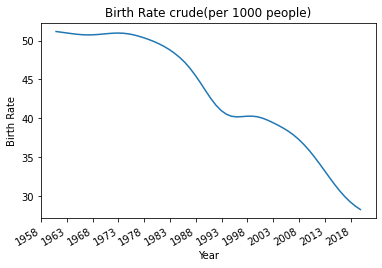

In [70]:
#visualize csv data
fig, ax = plt.subplots()
ax.plot(df['ds'],df['y'])

#transform the ticks (dates) ----- picked directly from matplotlib
# Major ticks every 6 months.
fmt_year = mdates.MonthLocator(interval = 60)
ax.xaxis.set_major_locator(fmt_year)

# Text in the x axis will be displayed in 'YYYY' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.title('Birth Rate crude(per 1000 people)')
plt.show()


                    -----Start Hyperparameter Tuning-----

In [39]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'n_changepoints' : [10,15,20],
    'seasonality_mode':('multiplicative','additive')
}

grid = ParameterGrid(param_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)


Total Possible Models 96


In [5]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         seasonality_prior_scale = p['seasonality_prior_scale'],
                         seasonality_mode = p['seasonality_mode'],
                         n_changepoints = p['n_changepoints'],
                       )
    
    train_model.fit(df)
    train_forecast = train_model.make_future_dataframe(periods=10, freq='Y')
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    
    #calculate MAPE using the real dataset and predicted values (remove the 10 years)
    MAPE = mean_absolute_percentage_error(df['y'],abs(test.loc[:59, 'yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.737782600601795
{'changepoint_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7326631771896346
{'changepoint_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7375293221575094
{'changepoint_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.736935637169752
{'changepoint_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.733956926231531
{'changepoint_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7351491511720307
{'changepoint_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.73470383981181
{'changepoint_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7345584372792553
{'changepoint_prior_scale': 0.001, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.735633763494502
{'changepoint_prior_scale': 0.001, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.732787983043927
{'changepoint_prior_scale': 0.001, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7374664986347237
{'changepoint_prior_scale': 0.001, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7368549709198153
{'changepoint_prior_scale': 0.001, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7338104669937104
{'changepoint_prior_scale': 0.001, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7352512384006027
{'changepoint_prior_scale': 0.001, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.734815194708701
{'changepoint_prior_scale': 0.001, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7346669484954402
{'changepoint_prior_scale': 0.001, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7379562500175836
{'changepoint_prior_scale': 0.001, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7340181708136786
{'changepoint_prior_scale': 0.001, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.737398240118998
{'changepoint_prior_scale': 0.001, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7368220563045935
{'changepoint_prior_scale': 0.001, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7336863151356896
{'changepoint_prior_scale': 0.001, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7353530935652275
{'changepoint_prior_scale': 0.001, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7348249564739873
{'changepoint_prior_scale': 0.001, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7346657493827977
{'changepoint_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.731229540569604
{'changepoint_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7317835311961645
{'changepoint_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7344125820524288
{'changepoint_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7321145281492676
{'changepoint_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7311419132423196
{'changepoint_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.731098358287447
{'changepoint_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7306292268199286
{'changepoint_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.730844796614062
{'changepoint_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.730801371624349
{'changepoint_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.729044313503703
{'changepoint_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.726103879946552
{'changepoint_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7262412880612614
{'changepoint_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7287927420974976
{'changepoint_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.727461905472989
{'changepoint_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.727641945230662
{'changepoint_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7274116319661306
{'changepoint_prior_scale': 0.01, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7293391337249555
{'changepoint_prior_scale': 0.01, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.726752561633015
{'changepoint_prior_scale': 0.01, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7261674599262986
{'changepoint_prior_scale': 0.01, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.724432420126924
{'changepoint_prior_scale': 0.01, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.7274876552921192
{'changepoint_prior_scale': 0.01, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.726967190661637
{'changepoint_prior_scale': 0.01, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.726116267074754
{'changepoint_prior_scale': 0.01, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 3.726521134329192
{'changepoint_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.24058172591533747
{'changepoint_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.23647615776092257
{'changepoint_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.23668578926210967
{'changepoint_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.2368353855925221
{'changepoint_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.24183955456736198
{'changepoint_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.24130036070544353
{'changepoint_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.239954232754864
{'changepoint_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.23994264418910868
{'changepoint_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.18275777358822198
{'changepoint_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.18136411328328045
{'changepoint_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.18077227574512875
{'changepoint_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.1763426540848962
{'changepoint_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.18177158092805493
{'changepoint_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.18181571757965173
{'changepoint_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.18171287035951522
{'changepoint_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.18168705028724913
{'changepoint_prior_scale': 0.1, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.16673173384665946
{'changepoint_prior_scale': 0.1, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.16193317216840242
{'changepoint_prior_scale': 0.1, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.1593714958243344
{'changepoint_prior_scale': 0.1, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.15651009742111968
{'changepoint_prior_scale': 0.1, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.16563500165911826
{'changepoint_prior_scale': 0.1, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.16564630111117618
{'changepoint_prior_scale': 0.1, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.16573805365023758
{'changepoint_prior_scale': 0.1, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.165718848119773
{'changepoint_prior_scale': 0.5, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.23670028510262942
{'changepoint_prior_scale': 0.5, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.2360292795038164
{'changepoint_prior_scale': 0.5, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.23659952269644474
{'changepoint_prior_scale': 0.5, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.2366258922908938
{'changepoint_prior_scale': 0.5, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.23803297785348426
{'changepoint_prior_scale': 0.5, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.23780045984071269
{'changepoint_prior_scale': 0.5, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.23695542435442857
{'changepoint_prior_scale': 0.5, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.23696700956780423
{'changepoint_prior_scale': 0.5, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.17576020140603665
{'changepoint_prior_scale': 0.5, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.1768995911600422
{'changepoint_prior_scale': 0.5, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.17723899145038055
{'changepoint_prior_scale': 0.5, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.17474884281464442
{'changepoint_prior_scale': 0.5, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.17469441447807418
{'changepoint_prior_scale': 0.5, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.17492835836431256
{'changepoint_prior_scale': 0.5, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.17500758520742987
{'changepoint_prior_scale': 0.5, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.17499719118103801
{'changepoint_prior_scale': 0.5, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.15702486781179062
{'changepoint_prior_scale': 0.5, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.15669909397632403
{'changepoint_prior_scale': 0.5, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.15677613278649338
{'changepoint_prior_scale': 0.5, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.1561149203254992
{'changepoint_prior_scale': 0.5, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.15619239011166042
{'changepoint_prior_scale': 0.5, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.15650320031132353
{'changepoint_prior_scale': 0.5, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.15701520360194135
{'changepoint_prior_scale': 0.5, 'n_changepoints': 20, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}
Mean Absolute Percentage Error(MAPE)------------------------------------ 0.1570827011759109


In [54]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()


,MAPE,Parameters
0,0.156115,"{'changepoint_prior_scale': 0.5, 'n_changepoin..."
1,0.156192,"{'changepoint_prior_scale': 0.5, 'n_changepoin..."
2,0.156503,"{'changepoint_prior_scale': 0.5, 'n_changepoin..."
3,0.156510,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
4,0.156699,"{'changepoint_prior_scale': 0.5, 'n_changepoin..."


In [55]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.5,
 'n_changepoints': 20,
 'seasonality_mode': 'multiplicative',
 'seasonality_prior_scale': 10.0}

In [56]:
# Setup and train model with holidays
final_model = Prophet(
                      changepoint_prior_scale= 0.5,
                      seasonality_prior_scale = 10.0,
                      n_changepoints = 20,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
)
final_model.fit(df)

In [74]:
tuned_future = final_model.make_future_dataframe(periods=10, freq='Y')
tuned_forecast = final_model.predict(tuned_future)
tuned_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
60,2019-12-31,25.938859,25.809845,26.051808
61,2020-12-31,24.742396,24.609681,24.882382
62,2021-12-31,24.154215,23.958991,24.352582
63,2022-12-31,23.579798,23.238151,23.898883
64,2023-12-31,22.940968,22.393542,23.494906
65,2024-12-31,21.817156,21.054045,22.562126
66,2025-12-31,21.246650,20.084460,22.357662
67,2026-12-31,20.610951,19.176279,22.023450
68,2027-12-31,19.980168,18.223620,21.738705
69,2028-12-31,18.876252,16.855825,20.947795


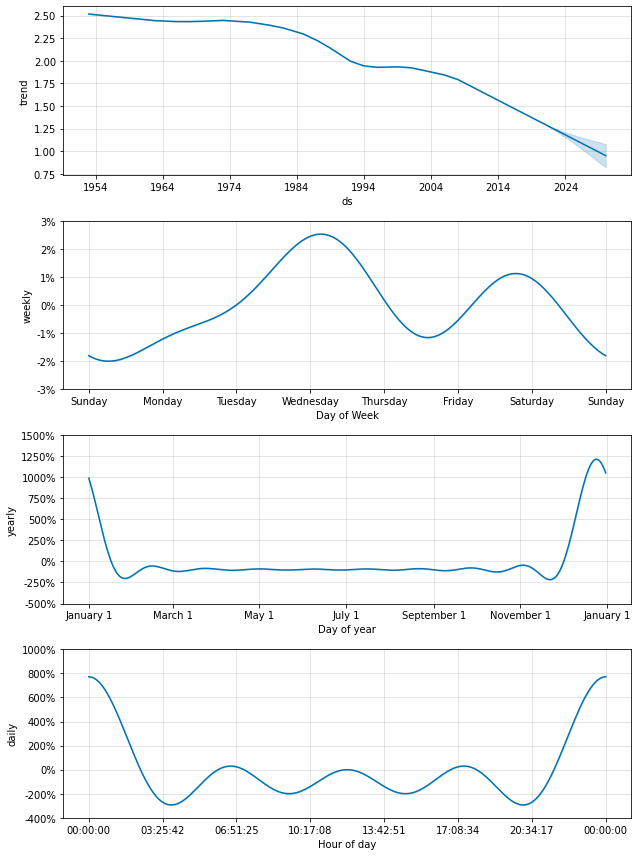

In [58]:
fig = final_model.plot_components(tuned_forecast)

INFO:prophet:Making 8 forecasts with cutoffs between 1984-06-26 00:00:00 and 2018-12-25 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 18.


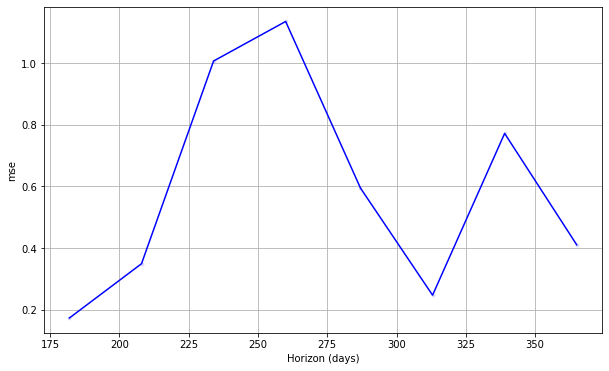

In [76]:
#check model perfomance using cross validation
#not sure how this works with little data

#create a custom cutoff date
cutoffs = pd.to_datetime(['1980-12-21','1990-12-21','2000-12-21'])

df_cv = cross_validation(final_model, initial='7300 days', period='1800 days', horizon = '365 days')

df_p = performance_metrics(df_cv)

fig = plot_cross_validation_metric(df_cv, metric='mse')


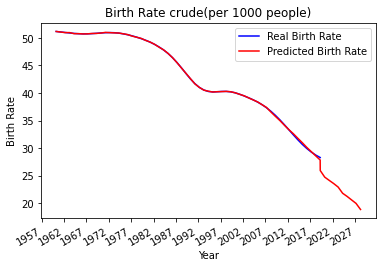

In [77]:
#visualize
fig, ax = plt.subplots()
ax.plot(df['ds'],df['y'], color = 'blue', label = 'Real Birth Rate')
ax.plot(tuned_forecast['ds'],tuned_forecast['yhat'], color = 'red', label = 'Predicted Birth Rate')

# Major ticks every 6 months.
fmt_year = mdates.MonthLocator(interval = 60)
ax.xaxis.set_major_locator(fmt_year)

# Text in the x axis will be displayed in 'YYYY' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()
plt.xlabel('Year')
plt.legend()
plt.ylabel('Birth Rate')
plt.title('Birth Rate crude(per 1000 people)')
plt.show()

In [83]:
# report performance
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(df['y'],tuned_forecast.loc[:59, 'yhat']))
print('RMSE: %.3f' %  rmse)

RMSE: 0.099


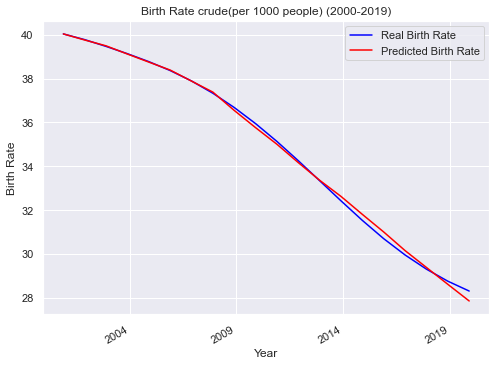

In [88]:
#visualize the test period (2000 to 2019)

#prep the data
df_a = df.loc[40:]
tuned_df_a = tuned_forecast.loc[40:59]


fig, ax = plt.subplots()
ax.plot(df_a['ds'],df_a['y'], color = 'blue', label = 'Real Birth Rate')
ax.plot(tuned_df_a['ds'],tuned_df_a['yhat'], color = 'red', label = 'Predicted Birth Rate')

# Major ticks every 6 months.
fmt_year = mdates.MonthLocator(interval = 60)
ax.xaxis.set_major_locator(fmt_year)

# Text in the x axis will be displayed in 'YYYY' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()
plt.xlabel('Year')
plt.legend()
plt.ylabel('Birth Rate')
plt.title('Birth Rate crude(per 1000 people) (2000-2019)')
plt.show()
sns.set(rc={'figure.figsize':(8,6)})